# IMPLEMENTACIÓN DEL MODELO LOGÍSTICO

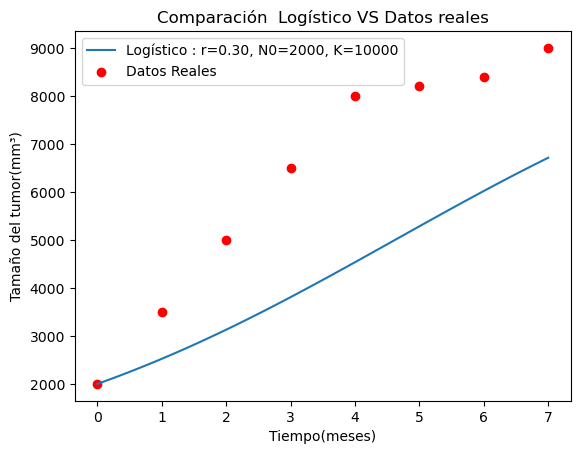

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000
# Función que representa la solución del modelo Logístico
def Log(t, K, r):
    C = 1 / volumen_mm3[0] - 1 / K
    return 1 / (np.exp(-r * t) * C + 1 / K)
# Condiciones iniciales
N0 =2000  # Tamaño inicial de la población

# Parámetros del modelo Logístico
r = 0.3
K = 10000

# Rango de tiempo
t_span = (0, 7)



# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Evaluar la solución en los puntos de tiempo para obtener la población en esos momentos
true_population_at_time_t_eval = Log(t_eval,K,r)

# Visualizar los resultados
plt.plot(t_eval, true_population_at_time_t_eval,label=f'Logístico : r={r:.2f}, N0={N0}, K={K}')

# Datos Reales (t, N)
import numpy as np

# Definir los datos como arrays de NumPy
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000

plt.scatter(meses,volumen_mm3, color='red', label='Datos Reales')

plt.xlabel('Tiempo(meses)')
plt.ylabel('Tamaño del tumor(mm³)')
plt.title('Comparación  Logístico VS Datos reales')
plt.legend()
plt.savefig('LogísticoVSdatos.png')
# Mostrar la gráfica
plt.show()


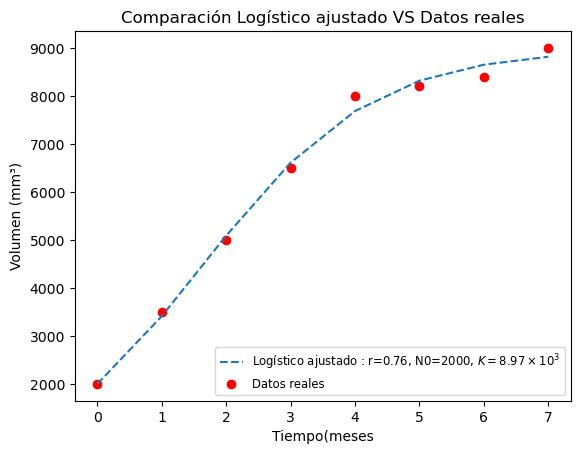

Parámetros ajustados (K, r): [8.96635243e+03 7.59688738e-01]


In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la solución del modelo Logístico
def Log(t, K, r):
    C = 1 / volumen_mm3[0] - 1 / K
    return 1 / (np.exp(-r * t) * C + 1 / K)

# Datos Reales (t, N)
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000

# Ajustar el modelo Logístico a los datos observados utilizando curve_fit
params, covariance = curve_fit(Log, meses, volumen_mm3, p0=[90000, 0.3], bounds=([1e-6, 0], [np.inf, np.inf]))
r=params[1]
K=params[0]
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(0, 7, 100)

# Generar la curva ajustada
fitted_curve = Log(meses, *params)

# Visualizar los resultados
plt.plot(meses, fitted_curve,label=f'Logístico ajustado : r={r:.2f}, N0={N0}, $K={K/1e3:.2f} \\times 10^3$', linestyle='--')
plt.scatter(meses, volumen_mm3, color='red', label='Datos reales')
plt.xlabel('Tiempo(meses')
plt.ylabel('Volumen (mm³)')
plt.title('Comparación Logístico ajustado VS Datos reales')
plt.legend(loc='lower right',fontsize='small')
plt.savefig('LogAjustVSdatos.png')
plt.show()

# Imprimir los parámetros ajustados
print("Parámetros ajustados (K, r):", params)

